# Introduction to statstics in python
1. Summary statstics
    - mean, median, mode, quantiles, IQR, outliers 
2. Distributions
    - uniform, binomial, normal, poisson, expotential 
3. Correlation
    - pmcc, log transformation

## Import Data

In [96]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "personality_dataset.csv"

# Load the latest version
df_full = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rakeshkapilavai/extrovert-vs-introvert-behavior-data",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print(df_full.info())

/var/folders/31/yy58x4y13nq668wbsn7pdk2r0000gn/T/ipykernel_8384/3091949232.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_full = kagglehub.load_dataset(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None


In [97]:
df = df_full.iloc[:,[0,2,3,4]].dropna()
print(df.head())

   Time_spent_Alone  Social_event_attendance  Going_outside  \
0               4.0                      4.0            6.0   
1               9.0                      0.0            0.0   
2               9.0                      1.0            2.0   
3               0.0                      6.0            7.0   
4               3.0                      9.0            4.0   

  Drained_after_socializing  
0                        No  
1                       Yes  
2                       Yes  
3                        No  
4                        No  


## 1. Summary Statstics


Numpy Stats doc: https://numpy.org/doc/2.1/reference/routines.statistics.html
1. Assumed flattened array unless "axis" is specified 
2. axis=1 -> x-axis
3. axis=0 -> y-axis
- min(), max(), ptp(a)
- quantile(a, []), percentile(a, []) 
- mean, median, std, var

In [98]:
# mean, median, mode
print("mean",df["Time_spent_Alone"].mean())
print("median",df["Time_spent_Alone"].median())
print("mode",df["Time_spent_Alone"].mode())

mean 4.485746436609152
median 4.0
mode 0    0.0
Name: Time_spent_Alone, dtype: float64


In [99]:
# mean, mode, count of Time_spent_Alone after grouping by Drained_after_socializing via groupby()
print(df.groupby("Drained_after_socializing")["Time_spent_Alone"].agg(["mean","median","count", lambda x: x.mode().iloc[0]]))

                               mean  median  count  <lambda_0>
Drained_after_socializing                                     
No                         1.528540     2.0   1349         0.0
Yes                        7.514806     8.0   1317         9.0


In [100]:
# mean, mode, count of Time_spent_Alone after grouping by Drained_after_socializing via pivot_table
print(df.pivot_table(index="Drained_after_socializing", values="Time_spent_Alone", aggfunc={"mean", "median", "count"}))

                           count      mean  median
Drained_after_socializing                         
No                          1349  1.528540     2.0
Yes                         1317  7.514806     8.0


In [101]:
import numpy as np

# range of Time_spent_Alone
print(df["Time_spent_Alone"].value_counts().sort_index())
print("range:", np.ptp(df["Time_spent_Alone"]))

Time_spent_Alone
0.0     352
1.0     302
2.0     344
3.0     332
4.0     178
5.0     169
6.0     139
7.0     176
8.0     166
9.0     192
10.0    182
11.0    134
Name: count, dtype: int64
range: 11.0


In [102]:
# Quantile
print(np.quantile(df["Time_spent_Alone"], [0,0.25,0.5,0.75,1]))
print(np.quantile(df["Time_spent_Alone"], np.linspace(0,1,5))) # Split into 4 sections with 5 endpoints
print(np.percentile(df["Time_spent_Alone"], [0,25,50,75,100]))
print(np.percentile(df["Time_spent_Alone"], np.linspace(0,100,5))) # Split into 4 sections with 5 endpoints

[ 0.  2.  4.  8. 11.]
[ 0.  2.  4.  8. 11.]
[ 0.  2.  4.  8. 11.]
[ 0.  2.  4.  8. 11.]


In [103]:
# IQR

from scipy.stats import iqr
print(iqr(df["Time_spent_Alone"]))

6.0


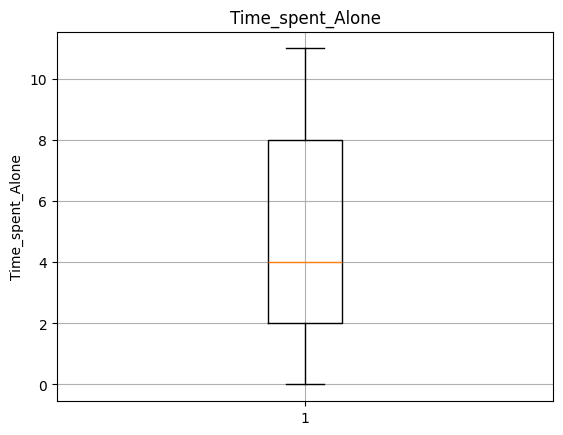

In [104]:
# Box plot
import matplotlib.pyplot as plt
plt.boxplot(df["Time_spent_Alone"])
plt.title("Time_spent_Alone")
plt.ylabel("Time_spent_Alone")
plt.grid(True)
plt.show()


[]

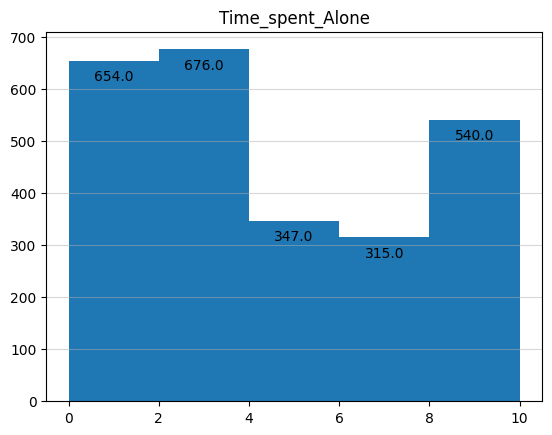

In [105]:
# plot "Time_spent_Alone"
counts, bin_edges, _ = plt.hist(df["Time_spent_Alone"], bins=[0,2,4,6,8,10])

# horizontal guideline
for i in range(len(counts)):
    # plt.axhline(y=counts[i], linestyle="dotted", alpha=0.6)
    plt.text((bin_edges[i]+bin_edges[i+1])/2, counts[i]-30, str(counts[i]), va="center",ha="center", color="black")
    # plt.text(x,y,text)
    
plt.title("Time_spent_Alone")
plt.grid(axis="y", alpha=0.5)

plt.plot()

## 2. Distributions
 - uniform, binomial, normal, poisson, expotential 
 - .rvs (random variates)
 - .pmf, .cdf


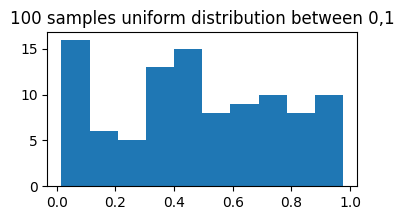

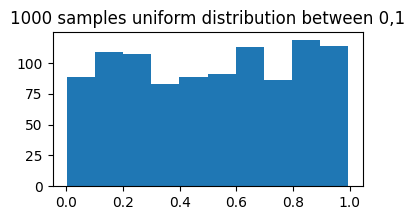

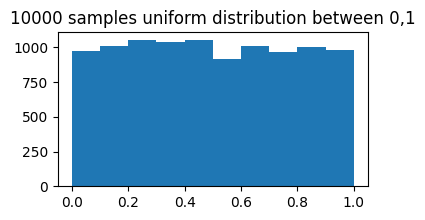

In [106]:
# Uniform graph
from scipy.stats import uniform

for size in [100,1000,10000]:
    plt.figure(figsize=(4,2))
    plt.hist(uniform.rvs(0,1,size=size))
    plt.title(f"{size} samples uniform distribution between 0,1")
plt.show()

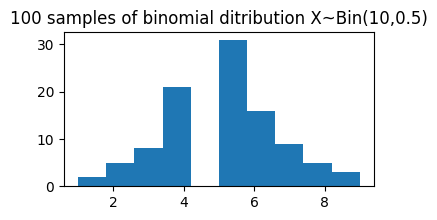

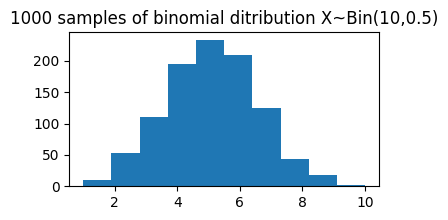

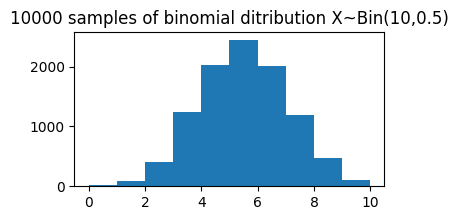

In [107]:
# Binomial graph with different size
from scipy.stats import binom

for size in [100,1000,10000]:
    plt.figure(figsize=(4,2))
    plt.hist(binom.rvs(10,0.5,size=size))
    plt.title(f"{size} samples of binomial ditribution X~Bin(10,0.5)")

plt.show()


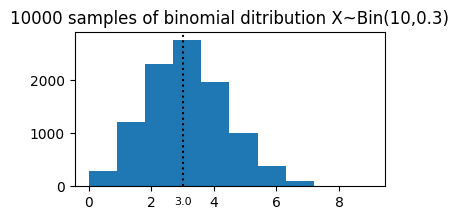

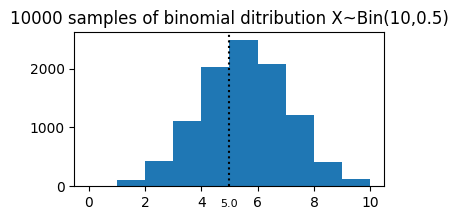

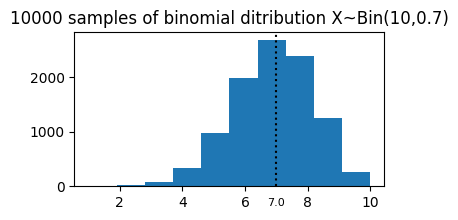

In [108]:
# Binomial graph with different p
from scipy.stats import binom

for p in [0.3, 0.5, 0.7]:
    plt.figure(figsize=(4,2))
    plt.hist(binom.rvs(10,p,size=10000))
    # show mean
    plt.axvline(x=10*p, linestyle="dotted", color="black")
    plt.text(x=10*p, y=-300, s=f"{10*p}",va="center",ha="center", fontsize="8")
    
    plt.title(f"10000 samples of binomial ditribution X~Bin(10,{p})")

plt.show()


## 3. Correlation
- pmcc, log transformation

In [109]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "student_habits_performance.csv"

# Load the latest version
stu_df_full = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "jayaantanaath/student-habits-vs-academic-performance",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print(stu_df_full.info())

/var/folders/31/yy58x4y13nq668wbsn7pdk2r0000gn/T/ipykernel_8384/831209826.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  stu_df_full = kagglehub.load_dataset(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [110]:
stu_df = stu_df_full.iloc[:, [0,1,5,7,8,13,15]]
print(stu_df)

    student_id  age  netflix_hours  attendance_percentage  sleep_hours  \
0        S1000   23            1.1                   85.0          8.0   
1        S1001   20            2.3                   97.3          4.6   
2        S1002   21            1.3                   94.8          8.0   
3        S1003   23            1.0                   71.0          9.2   
4        S1004   19            0.5                   90.9          4.9   
..         ...  ...            ...                    ...          ...   
995      S1995   21            1.6                   77.0          7.5   
996      S1996   17            2.4                   86.0          6.8   
997      S1997   20            1.3                   61.9          6.5   
998      S1998   24            1.1                  100.0          7.6   
999      S1999   19            1.9                   89.4          7.1   

     mental_health_rating  exam_score  
0                       8        56.2  
1                       8      

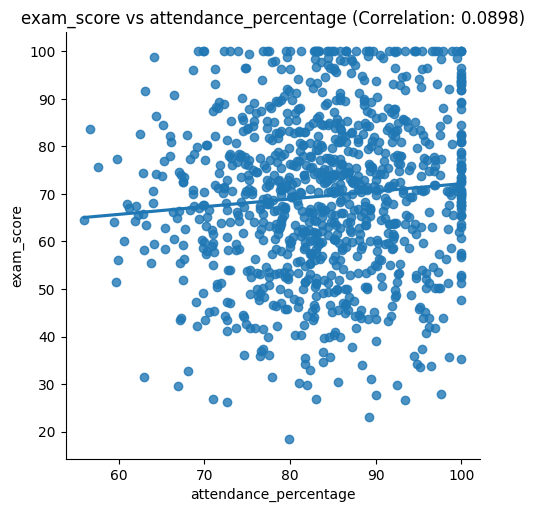

In [111]:
import seaborn as sns

def scatter_plot(x,y):
    sns.lmplot(x=x, y=y, data=stu_df, ci=None)
    plt.title(f"{y} vs {x} (Correlation: {(stu_df[x].corr(stu_df[y])).round(4)})")
    plt.show()
    
scatter_plot('attendance_percentage', 'exam_score')


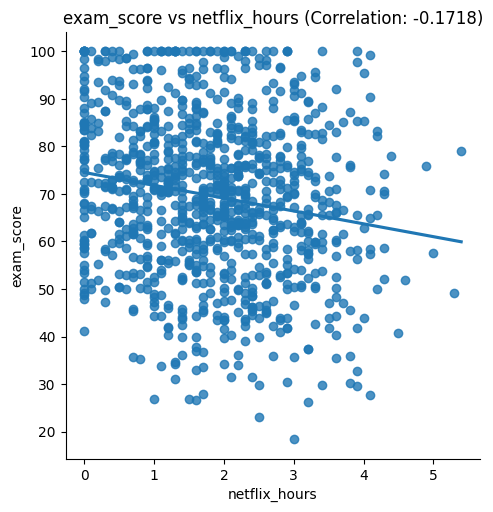

In [112]:
scatter_plot('netflix_hours', 'exam_score')

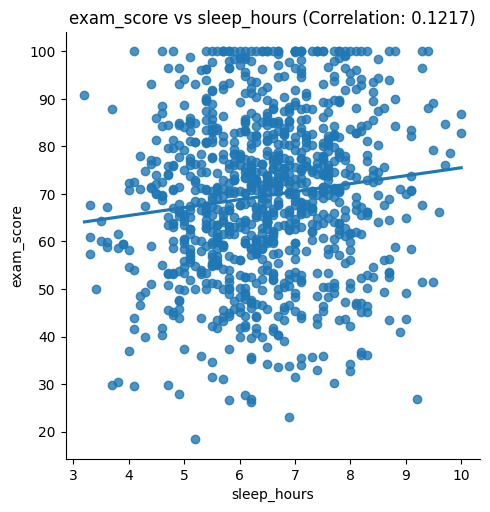

In [113]:
scatter_plot('sleep_hours', 'exam_score')